In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

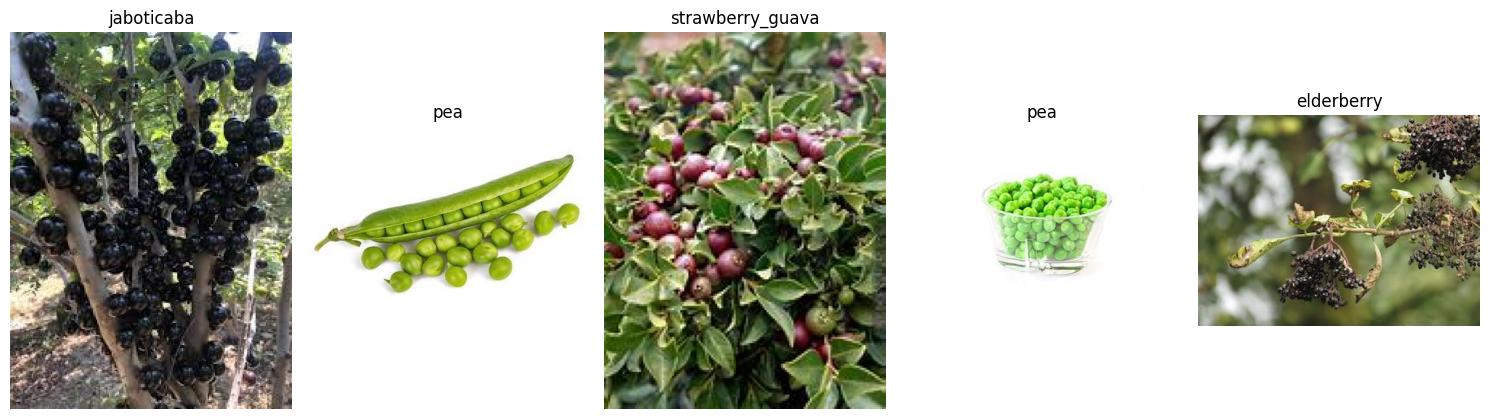

In [3]:
def plot_random_images(dataset_path, num_images=5):

    """
    从指定数据集中随机选取并展示图像
    
    参数:
        dataset_path: 包含分类子目录的数据集路径
        num_images: 要显示的图像数量
    """
    # Get class folders
    classes = [d for d in os.listdir(dataset_path)
               if os.path.isdir(os.path.join(dataset_path, d))]

    if not classes:
        print(f"No subdirectories found in {dataset_path}")
        return

    # Create plot
    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        # Randomly select classes
        selected_class = random.choice(classes)
        class_path = os.path.join(dataset_path, selected_class)

        # Get images
        images = [f for f in os.listdir(class_path)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not images:
            print(f"No images found in {selected_class}")
            continue

        # Randomly select image
        selected_image = random.choice(images)
        img_path = os.path.join(class_path, selected_image)

        # Plot image
        img = imread(img_path)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(selected_class)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
# Training Images 
train_path = r"C:\Users\Ennuielk\Documents\archive\Fruit_dataset\train1"
plot_random_images(dataset_path = train_path, num_images=5)

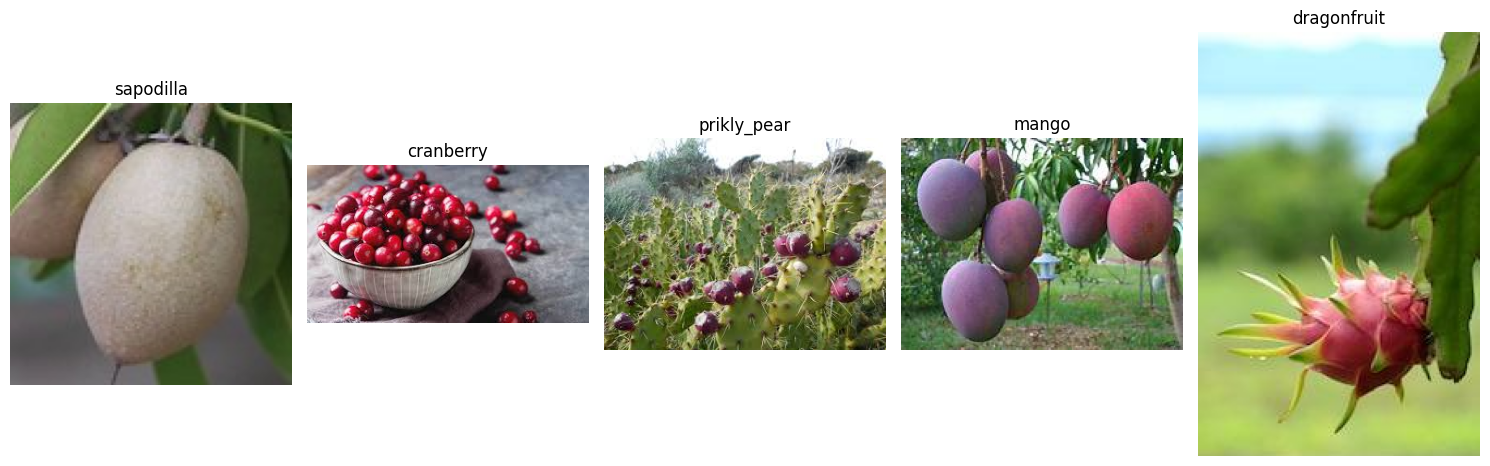

In [5]:
# Validation Images 
val_path = r"C:\Users\Ennuielk\Documents\archive\Fruit_dataset\val1"
plot_random_images(dataset_path = val_path, num_images=5)

In [4]:
# Define train and val paths
train_path = r"C:\Users\Ennuielk\Documents\archive\Fruit_dataset\train1"
val_path = r"C:\Users\Ennuielk\Documents\archive\Fruit_dataset\val1"

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='categorical',
    seed=42
)

# Create validation dataset
val_dataset = image_dataset_from_directory(
    val_path,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='categorical',
    seed=42
)

# Get class names
class_names = train_dataset.class_names

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
for image, label in train_dataset: 
    print(image.shape)
    break

# Print dataset information
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
print(f"Training batches: {tf.data.experimental.cardinality(train_dataset)}")
print(f"Validation batches: {tf.data.experimental.cardinality(val_dataset)}")

Found 40000 files belonging to 100 classes.
Found 5000 files belonging to 100 classes.
(32, 224, 224, 3)
Number of classes: 100
Class names: ['abiu', 'acai', 'acerola', 'ackee', 'ambarella', 'apple', 'apricot', 'avocado', 'banana', 'barbadine', 'barberry', 'betel_nut', 'bitter_gourd', 'black_berry', 'black_mullberry', 'brazil_nut', 'camu_camu', 'cashew', 'cempedak', 'chenet', 'cherimoya', 'chico', 'chokeberry', 'cluster_fig', 'coconut', 'corn_kernel', 'cranberry', 'cupuacu', 'custard_apple', 'damson', 'dewberry', 'dragonfruit', 'durian', 'eggplant', 'elderberry', 'emblic', 'feijoa', 'fig', 'finger_lime', 'gooseberry', 'goumi', 'grape', 'grapefruit', 'greengage', 'grenadilla', 'guava', 'hard_kiwi', 'hawthorn', 'hog_plum', 'horned_melon', 'indian_strawberry', 'jaboticaba', 'jackfruit', 'jalapeno', 'jamaica_cherry', 'jambul', 'jocote', 'jujube', 'kaffir_lime', 'kumquat', 'lablab', 'langsat', 'longan', 'mabolo', 'malay_apple', 'mandarine', 'mango', 'mangosteen', 'medlar', 'mock_strawberry'